In [18]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [19]:
# Criar dataframe Base_vendas
Base_vendas = pd.read_csv('/content/Mall_Customers.csv')

In [23]:
# Cabeçalho do Base_vendas
Base_vendas.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
# Instalar pandas profiling, recurso dentro do pandas para fazer análise exploratória de uma forma mais intuitiva
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=bbfb1a608d2b0c9828aa30da3c914ee8b856486dd730158f73b4e62fd76ef0c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-g_o_abqd/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [40]:
# Importar ProfileReport do Pandas profiling
from pandas_profiling import ProfileReport

In [41]:
# Gerar dashboard com todas as informações relevantes com o profile report
profile = ProfileReport(Base_vendas, title='Relatorio - Pandas profiling', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# Criar arquivo html com o dashboard gerado anteriormente
profile.to_file(output_file='kmeans.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

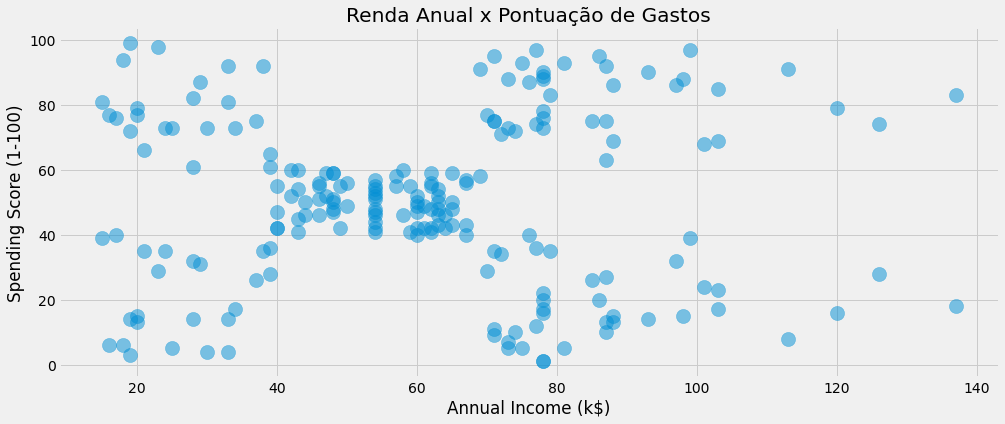

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=Base_vendas, s=200, alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

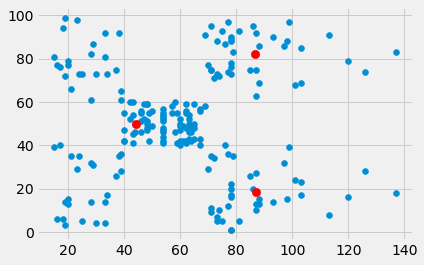

In [56]:
X2 = Base_vendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

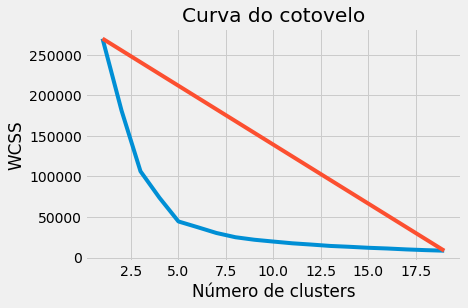

In [61]:
# Método para descobrir a quantidade de clusters necessária através da "curva do cotovelo"
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.plot([1,19],[wcss[0],wcss[len(wcss)-1]])
plt.title('Curva do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
44448.45544793371


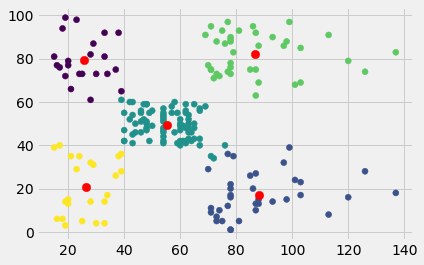

In [63]:
# Colocando novamente a função KMeans, agora com a quantidade de clusters ideal definida (5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

plt.scatter(X2[:,0],X2[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()